# ASP 3231 Project: NGC 3293
## Flat Image Combine - Cedric Liang

Here I will be combining the flat images in order to produce a median combined flat image.

In [1]:
import numpy as np
import astropy
import ccdproc
from ccdproc import CCDData, combiner
from astropy import units as u
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import gc
gc.enable()


In [62]:
# set root directory of repo
import os
root_path = os.path.normpath(os.getcwd() + os.sep + os.pardir)


In [63]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

flat_files = {"V": ccdproc.ImageFileCollection(f"{root_path}/data/", glob_include='Flat_V*'),
              "B": ccdproc.ImageFileCollection(f"{root_path}/data/", glob_include='Flat_B*'),
              "R": ccdproc.ImageFileCollection(f"{root_path}/data/", glob_include='Flat_R*')}

flats = {
    band: [CCDData.read(f"{root_path}/data/{fn}", unit="adu")
           for fn in image_files.files]
    for band, image_files
    in flat_files.items()}



In [64]:
#function to return a dict of flat stats, given an image
def flat_stats(image):
    return {
        'Min': np.min(image),
        'Max': np.max(image),
        'Mean': np.mean(image),
        'Median': np.median(image),
        'Stdev': np.std(image)
    }



In [65]:
print("V stats: ", flat_stats(flats["V"][0]))
print("\nB stats: ", flat_stats(flats["B"][0]))
print("\nR stats: ", flat_stats(flats["R"][0]))


V stats:  {'Min': 17068, 'Max': 24721, 'Mean': 22925.218607293875, 'Median': 23087.0, 'Stdev': 706.5667311365166}

B stats:  {'Min': 13175, 'Max': 22332, 'Mean': 20489.062079866442, 'Median': 20625.0, 'Stdev': 694.877838329988}

R stats:  {'Min': 6613, 'Max': 16822, 'Mean': 14905.913510842063, 'Median': 15013.0, 'Stdev': 550.4310847257935}


Here, our stats show that there is clearly a difference in the background for each flat, since the flats for each filter were taken successively. That's because they were taken successively, and as such we'll need to normalise.

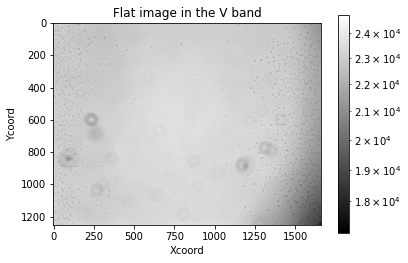

In [69]:
plt.imshow(flats["V"][0], cmap='gray', norm=LogNorm())
plt.colorbar()
plt.title("Flat image in the V band")
plt.xlabel("Xcoord")
plt.ylabel("Ycoord")
plt.show()

<font color="Blue"> Figure 1: Sample dark image in the V band, with a lognorm scaled applied to pixel counts.